In [27]:
from pyspark.sql import SparkSession
import pandas as pd

In [28]:
# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

In [29]:
students = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("datasets/Student_performance_data.csv")
students.printSchema()

root
 |-- StudentID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Ethnicity: integer (nullable = true)
 |-- ParentalEducation: integer (nullable = true)
 |-- StudyTimeWeekly: double (nullable = true)
 |-- Absences: integer (nullable = true)
 |-- Tutoring: integer (nullable = true)
 |-- ParentalSupport: integer (nullable = true)
 |-- Extracurricular: integer (nullable = true)
 |-- Sports: integer (nullable = true)
 |-- Music: integer (nullable = true)
 |-- Volunteering: integer (nullable = true)
 |-- GPA: double (nullable = true)
 |-- GradeClass: double (nullable = true)



In [30]:
students.show(5)

+---------+---+------+---------+-----------------+------------------+--------+--------+---------------+---------------+------+-----+------------+------------------+----------+
|StudentID|Age|Gender|Ethnicity|ParentalEducation|   StudyTimeWeekly|Absences|Tutoring|ParentalSupport|Extracurricular|Sports|Music|Volunteering|               GPA|GradeClass|
+---------+---+------+---------+-----------------+------------------+--------+--------+---------------+---------------+------+-----+------------+------------------+----------+
|     1001| 17|     1|        0|                2|19.833722807854713|       7|       1|              2|              0|     0|    1|           0| 2.929195591667681|       2.0|
|     1002| 18|     0|        0|                1| 15.40875605584674|       0|       0|              1|              0|     0|    0|           0| 3.042914833436377|       1.0|
|     1003| 15|     0|        2|                3|  4.21056976881226|      26|       0|              2|              0| 

In [31]:
students.count()

2392

In [32]:
students.select('GPA').describe().show()

+-------+------------------+
|summary|               GPA|
+-------+------------------+
|  count|              2392|
|   mean|1.9061863027265407|
| stddev|0.9151558203249597|
|    min|               0.0|
|    max|               4.0|
+-------+------------------+



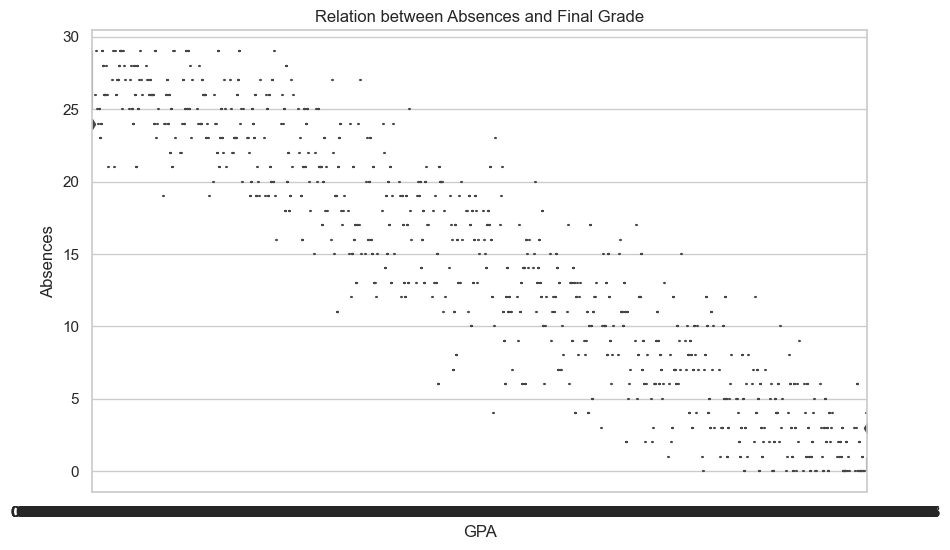

In [33]:
# check the relation between the Absences and the Final Grade
import matplotlib.pyplot as plt
import seaborn as sns

students_df = students.toPandas()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='Absences', data=students_df)
plt.title('Relation between Absences and Final Grade')
plt.show()

In [34]:
# compare students that listen to Music and do Sports GPA with students that don't
students.createOrReplaceTempView("students")
students_music_sports = spark.sql("SELECT * FROM students WHERE Music = '1' AND Sports = '1'")
students_music_sports.select('GPA').describe().collect()[1][1]

'2.070574631755155'

In [35]:
# compare students that listen to Music and do Sports GPA with students that don't
students.createOrReplaceTempView("students")
students_music_sports = spark.sql("SELECT * FROM students WHERE Music = '0' AND Sports = '0'")
students_music_sports.select('GPA').describe().collect()[1][1]

'1.8309393064817676'

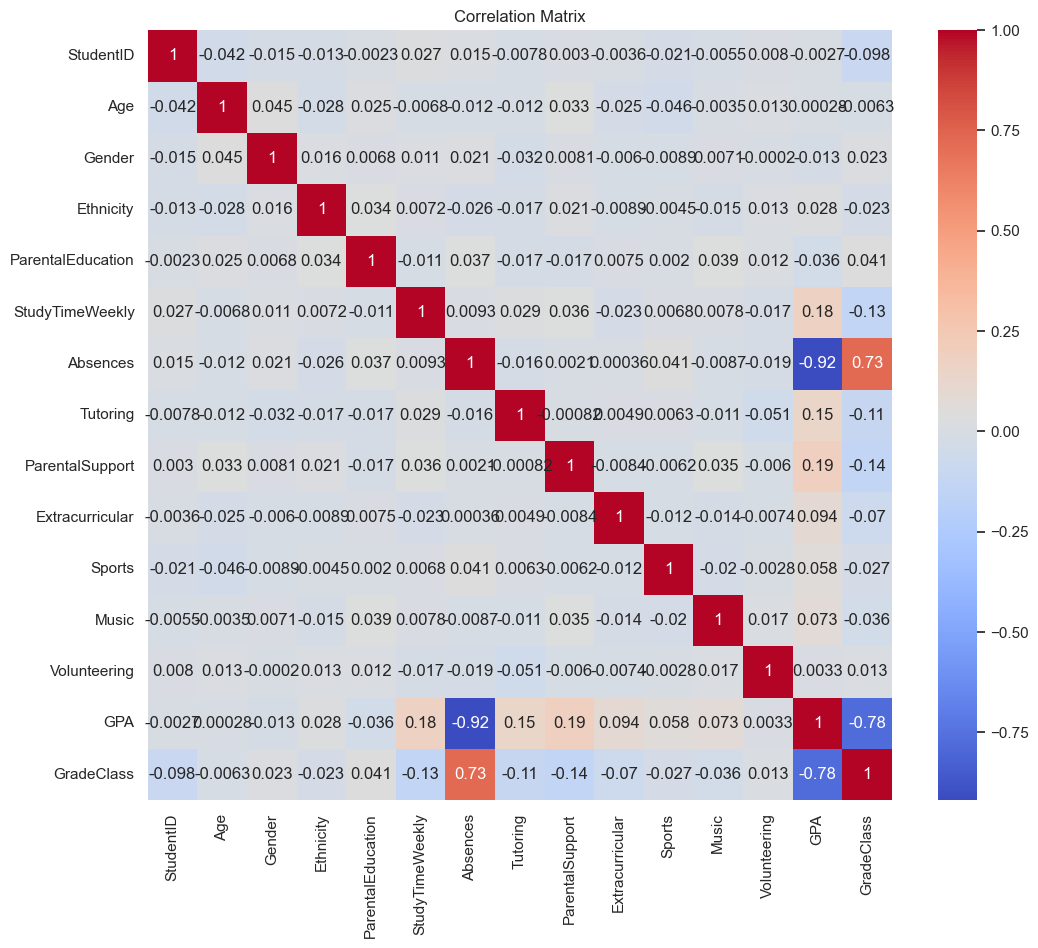

In [36]:
# get the correlation between the variables for all columns and show the correlation matrix
students_df = students.toPandas()
corr = students_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
#top 5 students with the highest GPA
students.orderBy(students.GPA.desc()).show(5)

+---------+---+------+---------+-----------------+------------------+--------+--------+---------------+---------------+------+-----+------------+---+----------+
|StudentID|Age|Gender|Ethnicity|ParentalEducation|   StudyTimeWeekly|Absences|Tutoring|ParentalSupport|Extracurricular|Sports|Music|Volunteering|GPA|GradeClass|
+---------+---+------+---------+-----------------+------------------+--------+--------+---------------+---------------+------+-----+------------+---+----------+
|     2920| 15|     0|        3|                1|17.442121274931623|       1|       1|              1|              1|     1|    0|           0|4.0|       0.0|
|     1443| 15|     0|        0|                2|19.424398237709887|       0|       0|              3|              0|     1|    1|           1|4.0|       0.0|
|     1045| 18|     1|        0|                1|18.921512361376628|       1|       1|              3|              1|     1|    0|           0|4.0|       0.0|
|     2279| 15|     1|        0|  

In [38]:
#lowest 5 students with the lowest GPA
students.createOrReplaceTempView("students")
students_lowest_gpa = spark.sql("SELECT * FROM students ORDER BY GPA ASC")
students_lowest_gpa.show(5)

+---------+---+------+---------+-----------------+------------------+--------+--------+---------------+---------------+------+-----+------------+---+----------+
|StudentID|Age|Gender|Ethnicity|ParentalEducation|   StudyTimeWeekly|Absences|Tutoring|ParentalSupport|Extracurricular|Sports|Music|Volunteering|GPA|GradeClass|
+---------+---+------+---------+-----------------+------------------+--------+--------+---------------+---------------+------+-----+------------+---+----------+
|     1964| 17|     0|        0|                4| 5.757590066696892|      26|       0|              0|              0|     0|    0|           0|0.0|       4.0|
|     2725| 16|     0|        3|                3|7.3016734656880145|      27|       0|              0|              0|     0|    0|           0|0.0|       4.0|
|     2287| 16|     0|        2|                3| 5.407664706213127|      26|       0|              0|              0|     0|    0|           0|0.0|       4.0|
|     1485| 15|     1|        0|  

In [43]:
#compare genders GPA and plot the results
students.createOrReplaceTempView("students")
female_gpa = spark.sql("SELECT GPA FROM students WHERE Gender = '0'")
male_gpa = spark.sql("SELECT GPA FROM students WHERE Gender = '1'")

In [44]:
female_gpa.describe().show()

+-------+------------------+
|summary|               GPA|
+-------+------------------+
|  count|              1170|
|   mean| 1.918678894880205|
| stddev|0.9139675258932535|
|    min|               0.0|
|    max|               4.0|
+-------+------------------+



In [45]:
male_gpa.describe().show()

+-------+------------------+
|summary|               GPA|
+-------+------------------+
|  count|              1222|
|   mean|1.8942253102389857|
| stddev|0.9165065950119664|
|    min|               0.0|
|    max|               4.0|
+-------+------------------+

